In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras.layers.recurrent import GRU


In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

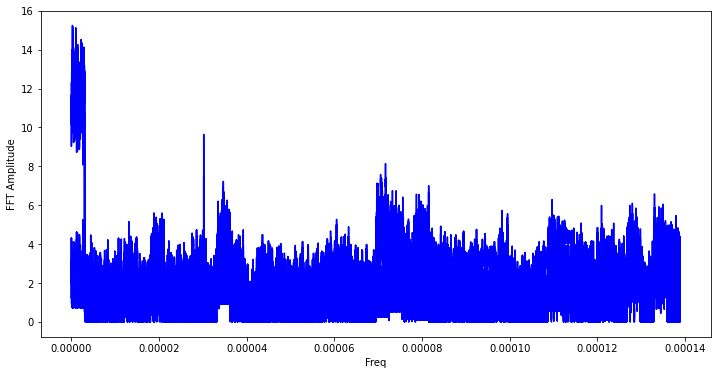

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [14]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

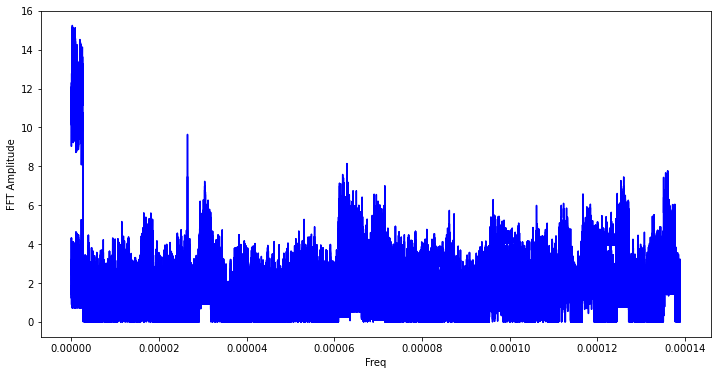

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [16]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [17]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])

In [18]:
X_Norm['Time ']=Normal_DPx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [19]:
X_cav['Time ']=Cavitation_DPx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391
...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805


In [20]:
X_train=X_Norm

In [21]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,10.949224,9.380308,-0.025825,-0.025825,9.380308
1,10.869041,9.445177,-0.050602,-0.050602,9.445177
2,10.893730,9.425203,-0.042973,-0.042973,9.425203
3,10.478212,9.761365,-0.171375,-0.171375,9.761365
4,10.967740,9.365328,-0.020103,-0.020103,9.365328
...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629
919996,-0.651565,0.785215,0.639496,0.639496,0.785215
919997,-1.122577,1.166271,0.493945,0.493945,1.166271
919998,-0.906607,0.991548,0.560684,0.560684,0.991548


In [22]:
X_train=np.array(X_train)


In [23]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [24]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [25]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(GRU(25, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(GRU(5, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(GRU(5, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(GRU(25, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [26]:
X_test=X_cav

In [27]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242
1,6.477165,0.816141,-0.389844,-0.389844,0.816141
2,6.314395,0.947824,-0.440142,-0.440142,0.947824
3,6.760710,0.586748,-0.302223,-0.302223,0.586748
4,5.886511,1.293990,-0.572366,-0.572366,1.293990
...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682


In [28]:
X_test.shape

(1048576, 5)

In [29]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 73s 30ms/step - loss: 0.2036 - val_loss: 0.1572
Epoch 2/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0830 - val_loss: 0.1634
Epoch 3/150
1797/1797 [==============================] - 53s 29ms/step - loss: 0.0770 - val_loss: 0.1003
Epoch 4/150
1797/1797 [==============================] - 51s 28ms/step - loss: 0.0734 - val_loss: 0.0932
Epoch 5/150
1797/1797 [==============================] - 53s 29ms/step - loss: 0.0711 - val_loss: 0.0753
Epoch 6/150
1797/1797 [==============================] - 50s 28ms/step - loss: 0.0671 - val_loss: 0.0744
Epoch 7/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0665 - val_loss: 0.0668
Epoch 8/150
1797/1797 [==============================] - 50s 28ms/step - loss: 0.0639 - val_loss: 0.0677
Epoch 9/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0624 - val_loss: 0.0686
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 52s 29ms/step - loss: 0.0440 - val_loss: 0.0584
Epoch 79/150
1797/1797 [==============================] - 53s 29ms/step - loss: 0.0442 - val_loss: 0.0625
Epoch 80/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0444 - val_loss: 0.0597
Epoch 81/150
1797/1797 [==============================] - 53s 29ms/step - loss: 0.0435 - val_loss: 0.0622
Epoch 82/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.0435 - val_loss: 0.0604
Epoch 83/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0444 - val_loss: 0.0554
Epoch 84/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.0444 - val_loss: 0.0533
Epoch 85/150
1797/1797 [==============================] - 51s 28ms/step - loss: 0.0445 - val_loss: 0.0512
Epoch 86/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.0443 - val_loss: 0.0560
Epoch 87/150
1797/1797 [==============================] - 5

In [30]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 115s 4ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

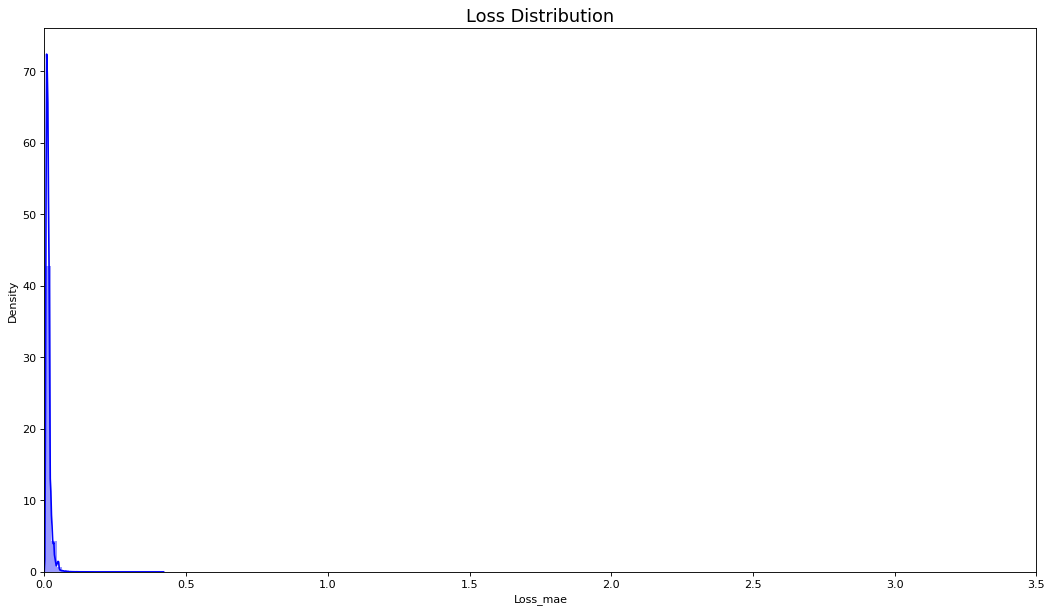

In [31]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [32]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 134s 4ms/step


In [33]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

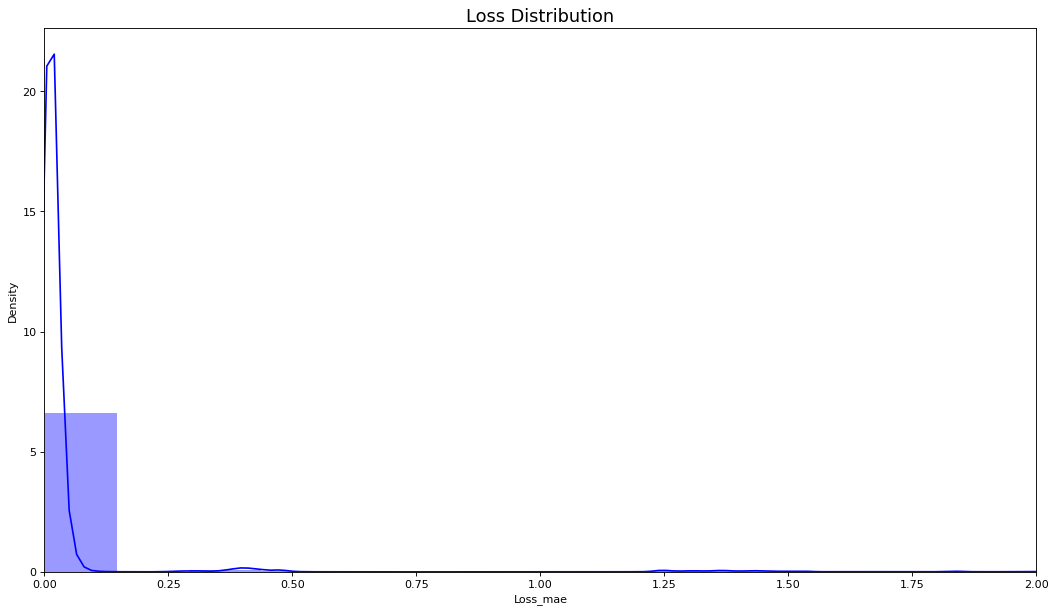

In [34]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

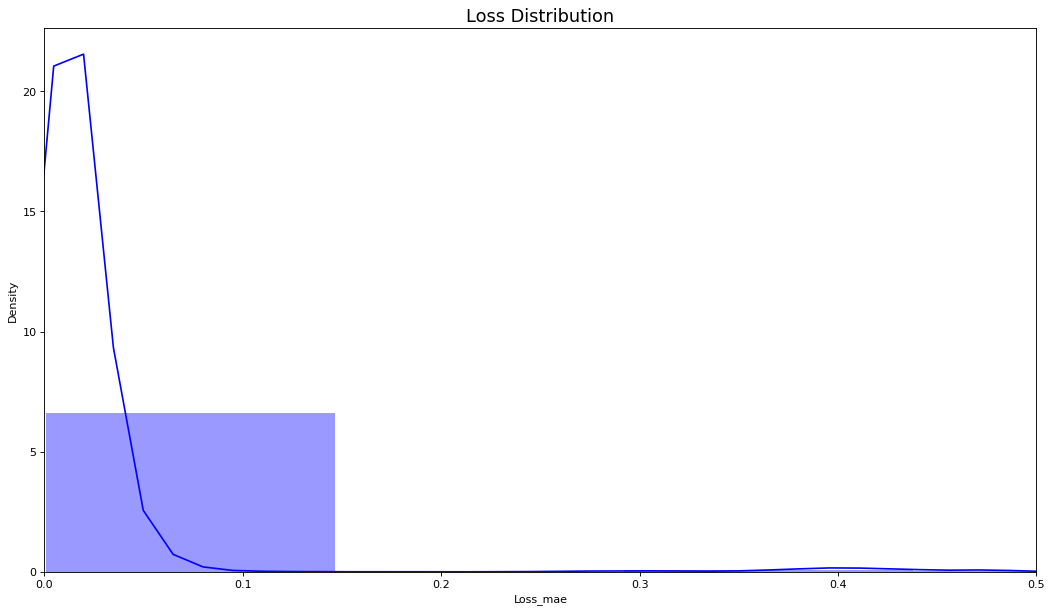

In [35]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.5])

In [44]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.2

In [45]:
test_mae_loss.shape

(1048576, 1)

In [46]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


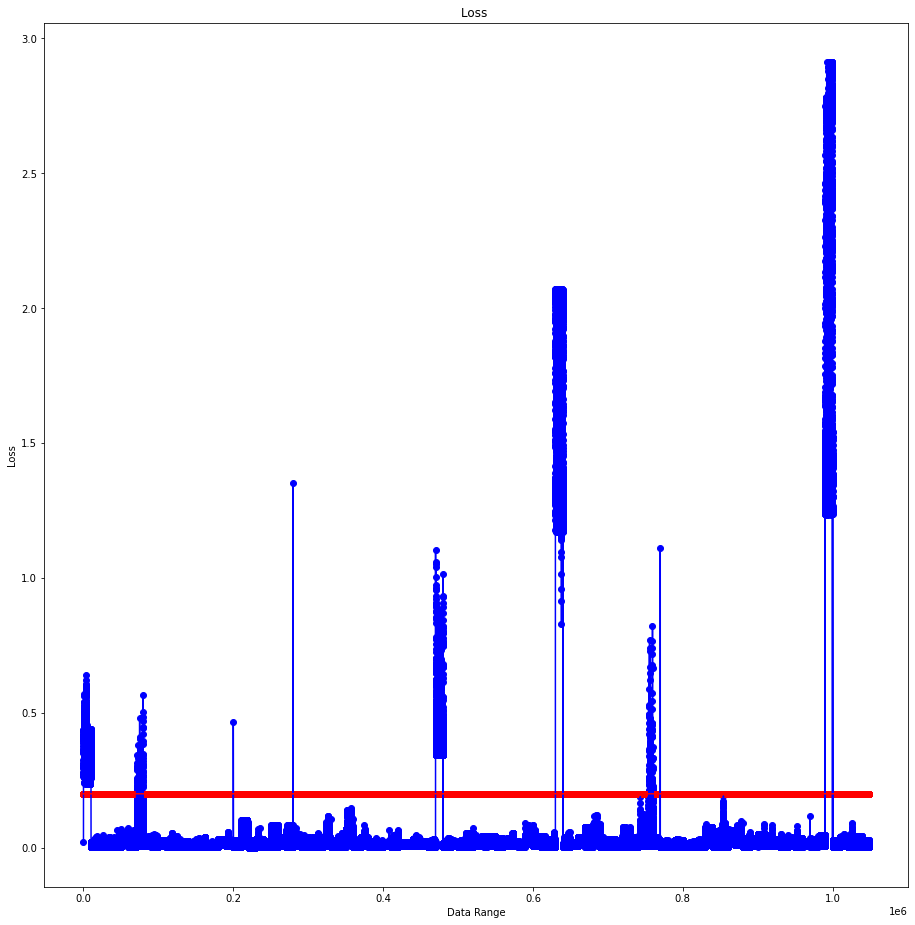

In [47]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [48]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000,0.023062,0.2,False
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.400778,0.2,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.413508,0.2,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.351018,0.2,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.432667,0.2,True
...,...,...,...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512,0.009054,0.2,False
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609,0.013878,0.2,False
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707,0.011284,0.2,False
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805,0.012838,0.2,False


In [49]:
test_score_df["anomaly"][1]

True

In [50]:
anomalies=test_score_df


In [51]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.400778,0.2,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.413508,0.2,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.351018,0.2,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.432667,0.2,True
5,6.584858,0.729015,-0.356564,-0.356564,0.729015,0.000488,0.399555,0.2,True
...,...,...,...,...,...,...,...,...,...
999995,-10.668763,-7.098123,0.068420,0.068420,-7.098123,97.655762,1.437659,0.2,True
999996,-10.025564,-7.618482,0.267179,0.267179,-7.618482,97.655859,1.235389,0.2,True
999997,-10.823654,-6.972813,0.020556,0.020556,-6.972813,97.655957,1.445554,0.2,True
999998,-10.311711,-7.386984,0.178755,0.178755,-7.386984,97.656055,1.368733,0.2,True


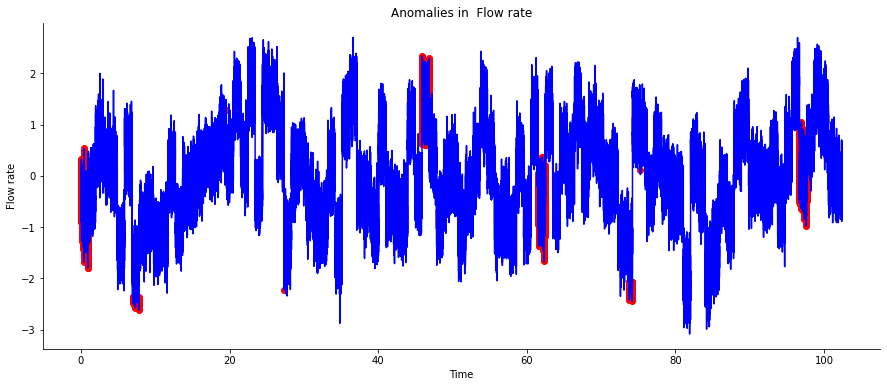

In [52]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

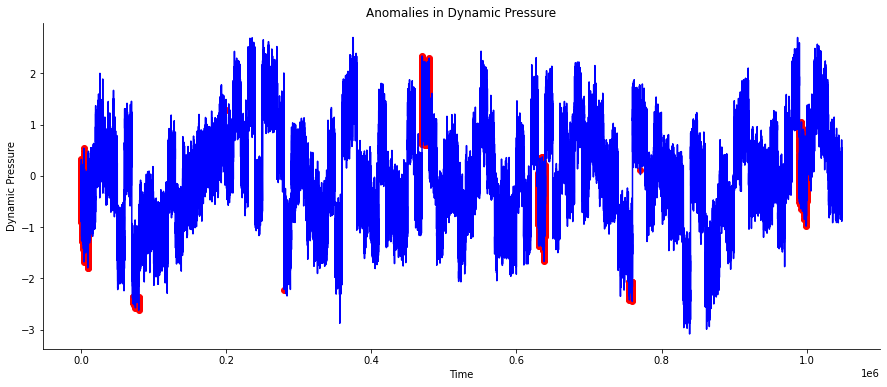

In [53]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

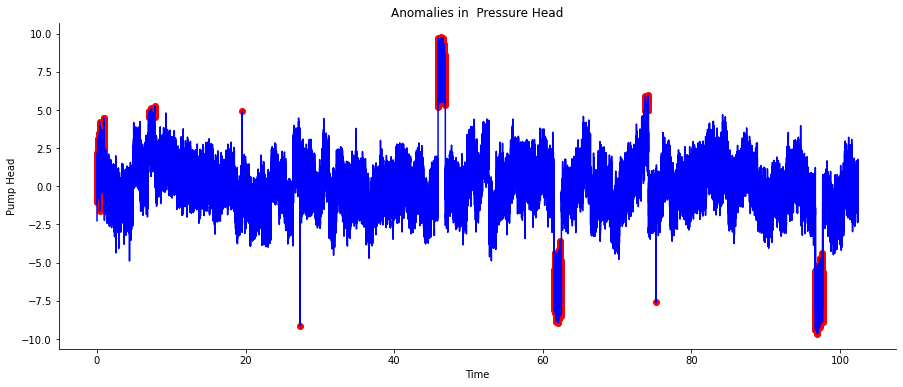

In [54]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

In [55]:
model.save("Bi_GRU01_DP_frequency")


INFO:tensorflow:Assets written to: Bi_GRU01_DP_frequency\assets


# Vibration


In [56]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [57]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [58]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [59]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [60]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [61]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [62]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [63]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [64]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [65]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [66]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

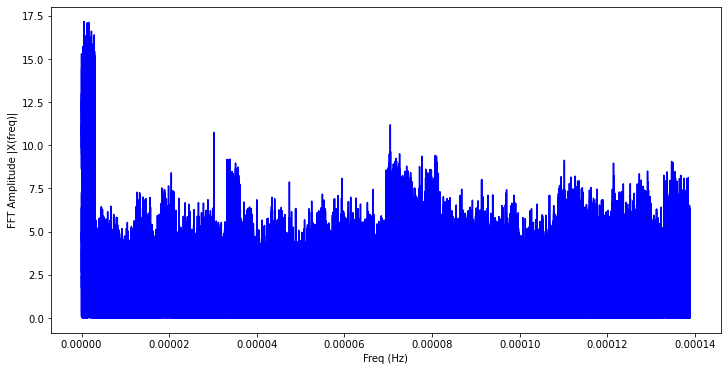

In [67]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [68]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

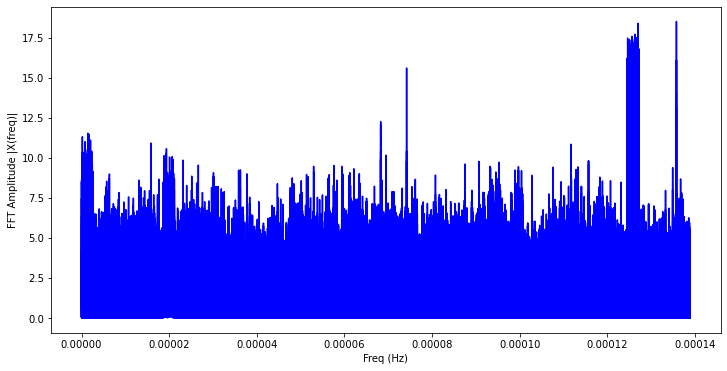

In [69]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [70]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [71]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [72]:
X_Norm['Time ']=Normal_Vibx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866,0.000000
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993,0.000098
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361,0.000195
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410,0.000293
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047,0.000391
...,...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512,89.843262
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837,89.843359
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768,89.843457
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567,89.843555


In [73]:
X_cav['Time ']=Cavitation_Vibx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [74]:
X_train=X_Norm

In [75]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047
...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567


In [76]:
X_train=np.array(X_train)


In [77]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [78]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [81]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(GRU(36, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(GRU(6, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(GRU(6, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(GRU(36, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [82]:
X_test=X_cav

In [83]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576
...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610


In [84]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 141s 71ms/step - loss: 0.2874 - val_loss: 0.1313
Epoch 2/150
1797/1797 [==============================] - 112s 62ms/step - loss: 0.1109 - val_loss: 0.1121
Epoch 3/150
1797/1797 [==============================] - 113s 63ms/step - loss: 0.1003 - val_loss: 0.0912
Epoch 4/150
1797/1797 [==============================] - 112s 62ms/step - loss: 0.0948 - val_loss: 0.1012
Epoch 5/150
1797/1797 [==============================] - 111s 62ms/step - loss: 0.0907 - val_loss: 0.0787
Epoch 6/150
1797/1797 [==============================] - 111s 62ms/step - loss: 0.0869 - val_loss: 0.0787
Epoch 7/150
1797/1797 [==============================] - 111s 62ms/step - loss: 0.0857 - val_loss: 0.0770
Epoch 8/150
1797/1797 [==============================] - 114s 64ms/step - loss: 0.0837 - val_loss: 0.0774
Epoch 9/150
1797/1797 [==============================] - 130s 72ms/step - loss: 0.0817 - val_loss: 0.0877
Epoch 10/150
1797/1797 [======================

1797/1797 [==============================] - 170s 94ms/step - loss: 0.0506 - val_loss: 0.0646
Epoch 78/150
1797/1797 [==============================] - 151s 84ms/step - loss: 0.0497 - val_loss: 0.0659
Epoch 79/150
1797/1797 [==============================] - 133s 74ms/step - loss: 0.0515 - val_loss: 0.0727
Epoch 80/150
1797/1797 [==============================] - 124s 69ms/step - loss: 0.0498 - val_loss: 0.0696
Epoch 81/150
1797/1797 [==============================] - 123s 69ms/step - loss: 0.0503 - val_loss: 0.0750
Epoch 82/150
1797/1797 [==============================] - 121s 67ms/step - loss: 0.0494 - val_loss: 0.0738
Epoch 83/150
1797/1797 [==============================] - 122s 68ms/step - loss: 0.0498 - val_loss: 0.0599
Epoch 84/150
1797/1797 [==============================] - 122s 68ms/step - loss: 0.0494 - val_loss: 0.0695
Epoch 85/150
1797/1797 [==============================] - 126s 70ms/step - loss: 0.0498 - val_loss: 0.0606
Epoch 86/150
1797/1797 [==========================

In [85]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 108s 4ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

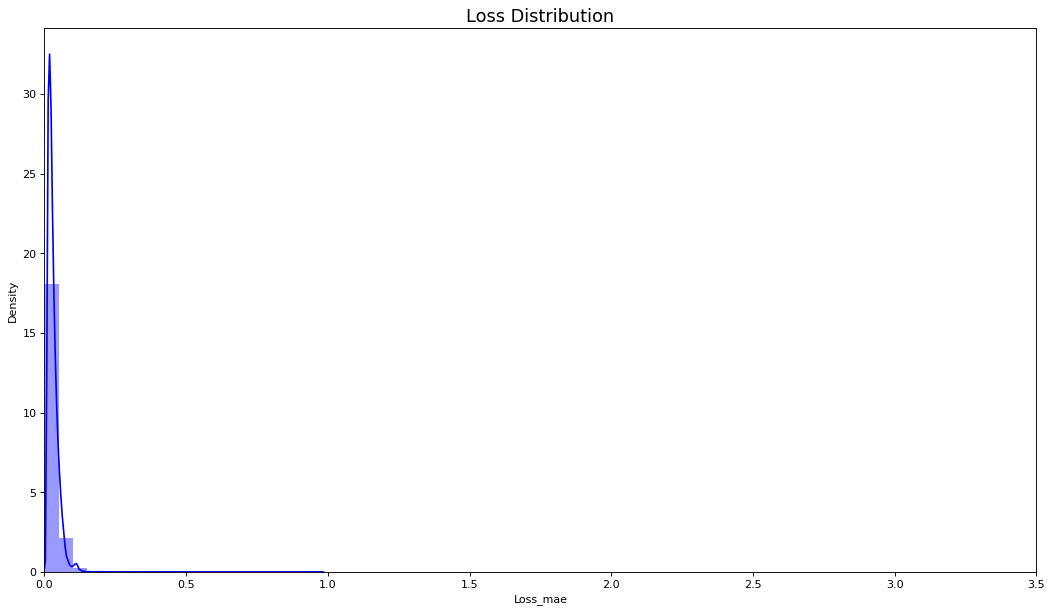

In [86]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [87]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 137s 4ms/step


In [88]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

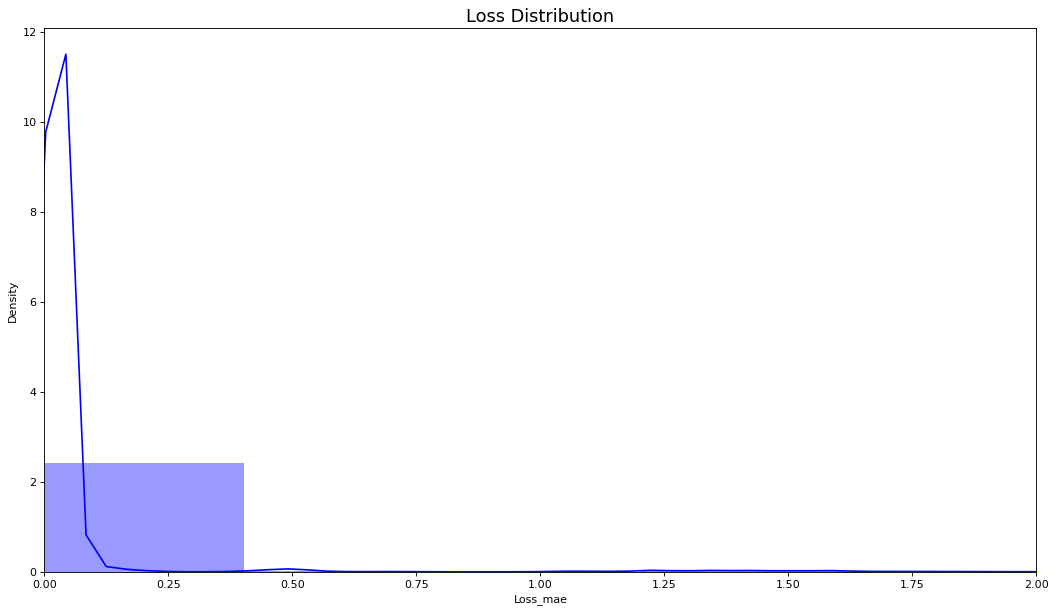

In [89]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

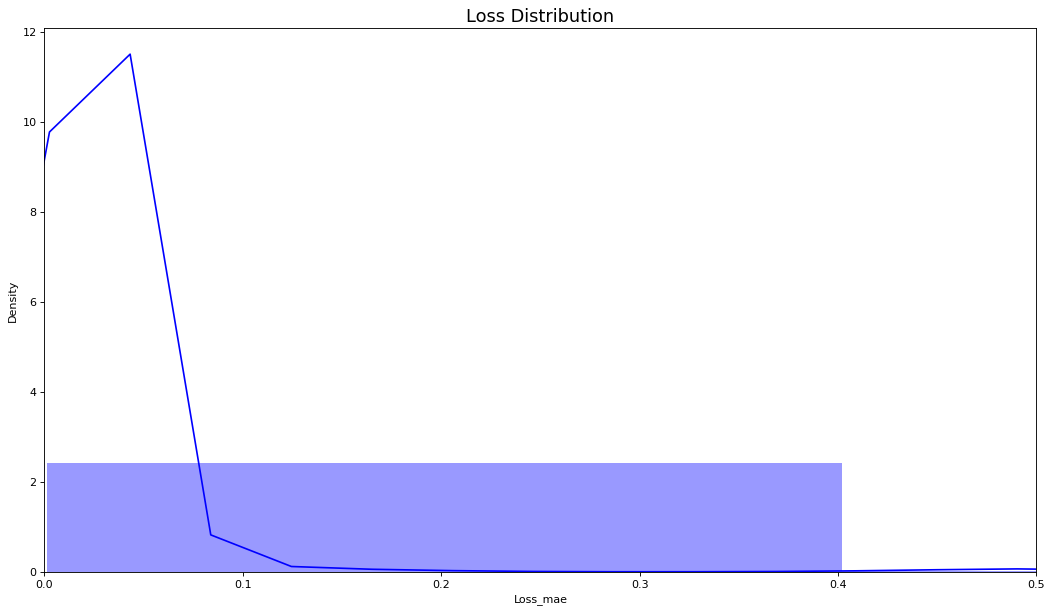

In [90]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.5])

In [91]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.3

In [92]:
test_mae_loss.shape

(1048576, 1)

In [93]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


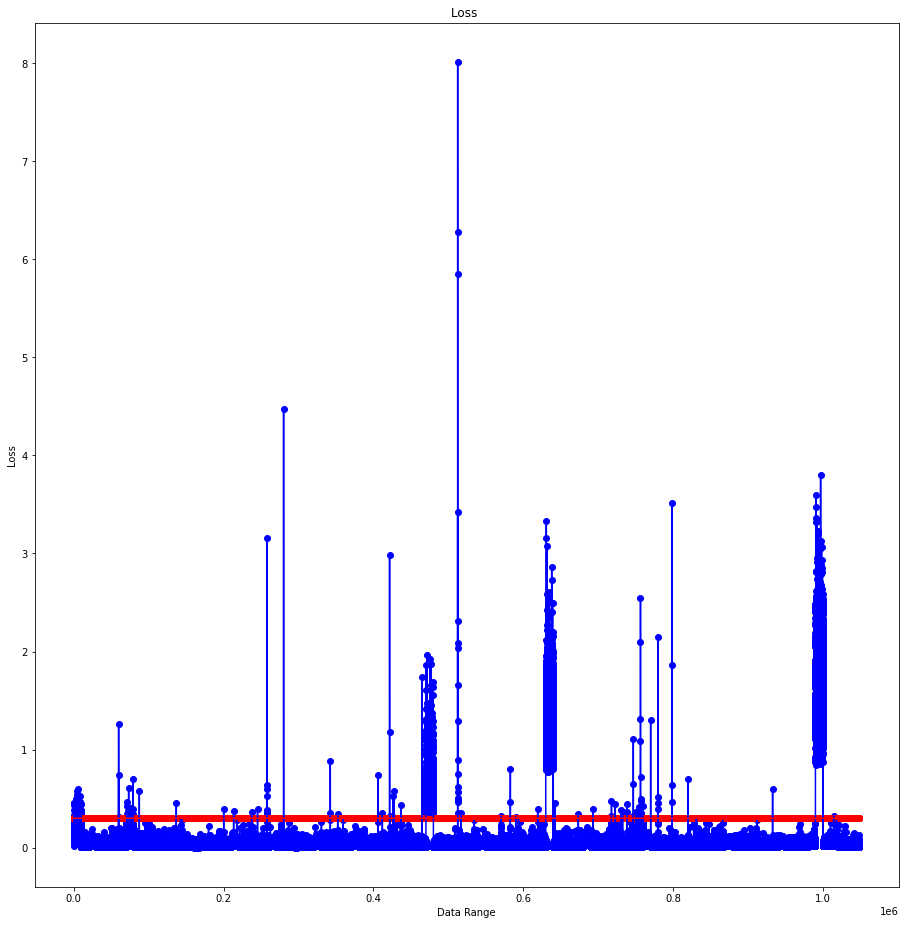

In [94]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [95]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000,0.018234,0.3,False
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098,0.079413,0.3,False
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195,0.166369,0.3,False
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293,0.134437,0.3,False
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391,0.086768,0.3,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512,0.016013,0.3,False
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609,0.011062,0.3,False
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707,0.016571,0.3,False
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805,0.019299,0.3,False


In [96]:
test_score_df["anomaly"][1]

False

In [97]:
anomalies=test_score_df


In [98]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
85,1.740791,6.136927,-3.961834,2.704735,-3.961834,6.136927,0.008301,0.300666,0.3,True
372,10.296910,-0.605358,-0.847215,1.403949,-0.847215,-0.605358,0.036328,0.433017,0.3,True
477,9.091329,-0.126300,0.126774,-0.296563,0.126774,-0.126300,0.046582,0.327053,0.3,True
514,1.383108,5.415543,-1.082314,-1.253854,-1.082314,5.415543,0.050195,0.314839,0.3,True
517,0.610989,6.997001,-4.282451,2.755623,-4.282451,6.997001,0.050488,0.451730,0.3,True
...,...,...,...,...,...,...,...,...,...,...
999996,-11.829007,-6.804010,-3.803379,3.369981,-3.803379,-6.804010,97.655859,1.196625,0.3,True
999997,-13.487304,-6.046403,-2.759607,1.425520,-2.759607,-6.046403,97.655957,1.116916,0.3,True
999998,-11.981505,-7.325972,-1.932497,0.824640,-1.932497,-7.325972,97.656055,1.129648,0.3,True
999999,-8.645048,-9.556345,-1.914292,1.912519,-1.914292,-9.556345,97.656152,2.496377,0.3,True


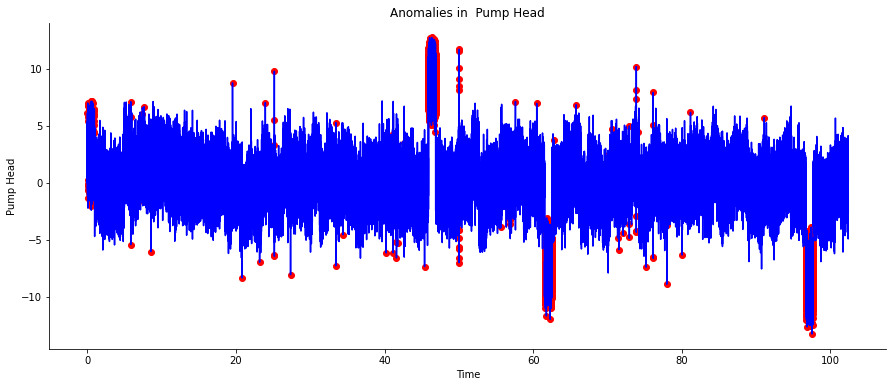

In [99]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

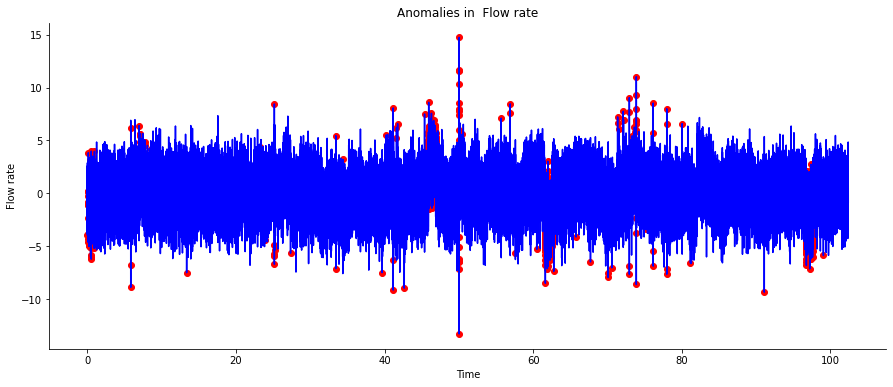

In [100]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

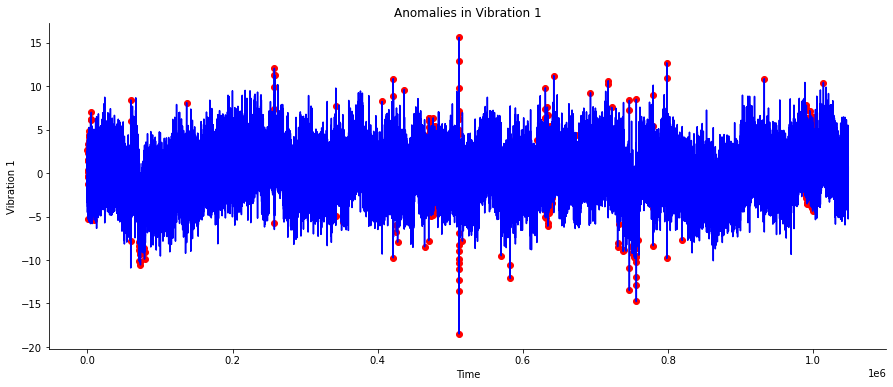

In [101]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

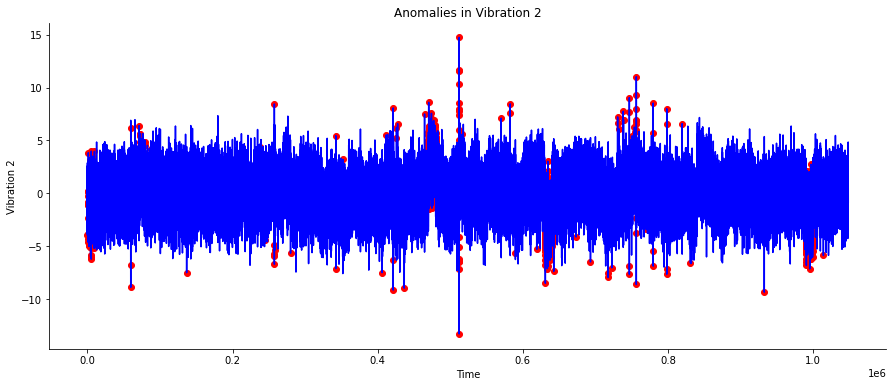

In [102]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

In [103]:
model.save("Bi_GRU01_Vib_frequency")


INFO:tensorflow:Assets written to: Bi_GRU01_Vib_frequency\assets


INFO:tensorflow:Assets written to: Bi_GRU01_Vib_frequency\assets
